In this documnet, we apply PCA to face data to see how well it works at reducing the dimensionality. This notebook is based on code written by: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Below are the imports necessary for the file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

The "Loaded Faces in the Wild" dataset is download. It consists of 5749 classes, 13233 samples, 5828 dimensions, and each dimesnions is a real number in [0, 255]. Each image has height 62 pixels and width 47 pixels. More information can be found in the docs:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


I want to make a function that gets the max amount of faces per person.

In [3]:
# values = range(len(faces.target_names))

# # Find the first instance of each value
# indexes = []
# for value in values:
#     indices = np.where(faces.target == value)[0]
#     if len(indices) > 0:
#         first_index = indices[0]
#         indexes.append(first_index)
#     else:
#         indexes.append(None)
# print(indexes)

# faces.target = faces.target[indexes]
# faces.images = faces.images[indexes]
# faces.data = faces.data[indexes]

# PCA Reduction on Face data

Each image is 62 by 47 so there are 2914 features in this dataset that we are interested in.

In [4]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA()
pca.fit(faces.data)

PCA()

Now we wish to choose the number of dimesnions for the reduction.

In [5]:
print("The number of components to keep by Kaiser's rule is:", 
      len(pca.explained_variance_[pca.explained_variance_ >=1]))

The number of components to keep by Kaiser's rule is: 10


Scree Plot

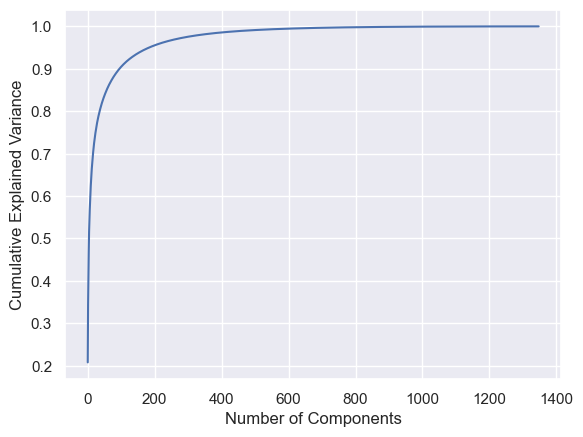

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.savefig("PCA_faces_scree.pdf", bbox_inches='tight')
plt.show()

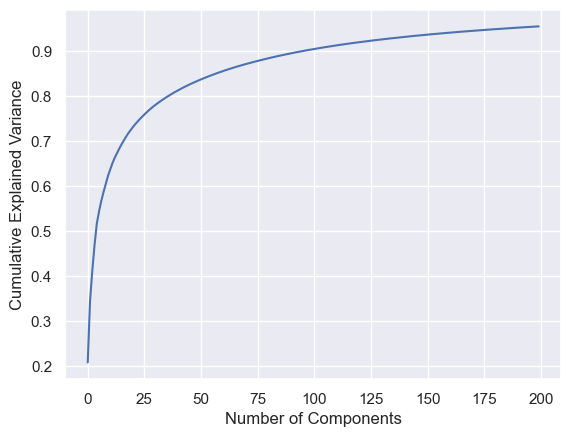

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:200])
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.savefig("PCA_faces_scree_cutoff.pdf", bbox_inches='tight')
plt.show()

Plotting the principal components. Each one appears to loook like a face.

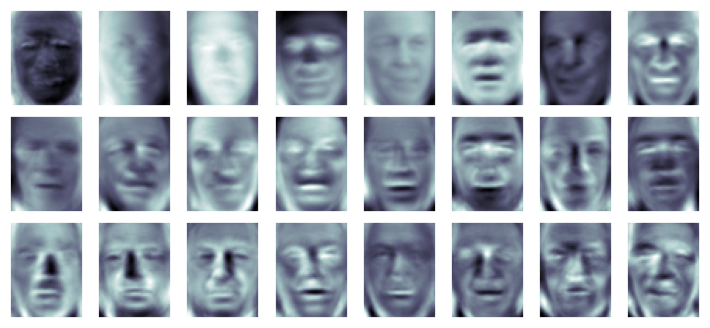

In [8]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
# plt.savefig("PCA_faces_eigenfaces.pdf", bbox_inches='tight')
plt.show()

# Covariance Matrix

IDK why it looks so weird.

In [9]:
faces.data.shape

(1348, 2914)

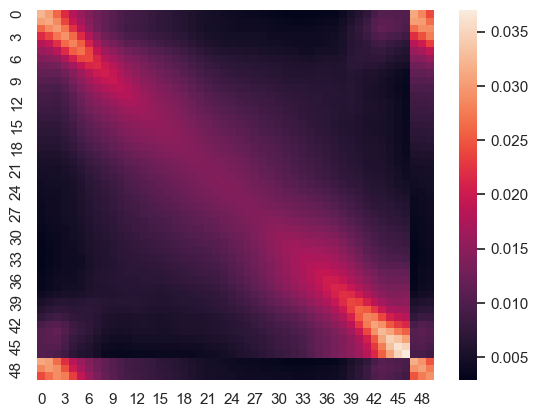

In [10]:
Cx = np.cov(faces.data.T, bias=True)
Cx.shape
sns.heatmap(Cx[:50,:50], annot=False, fmt='g')
#plt.savefig("test.pdf", bbox_inches='tight')
plt.show()

In [11]:
Xm = np.mean(faces.data, axis=0)
Xs = np.std(faces.data, axis=0)
Xv = np.var(faces.data, axis=0)

In [12]:
Xn = (faces.data-Xm)/Xs

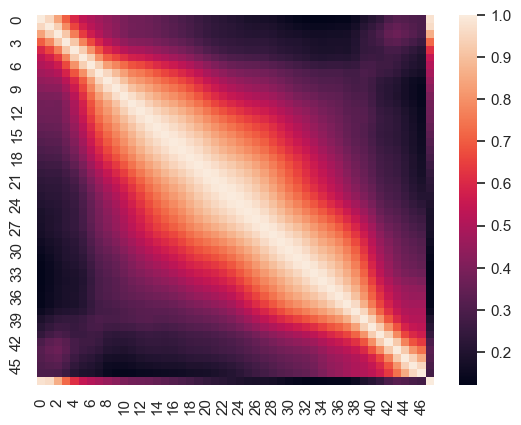

In [22]:
C = np.cov(Xn.T, bias=True)
C.shape
sns.heatmap(C[0:48, 0:48], annot=False, fmt='g')
# plt.savefig("PCA_faces_heatmap.pdf", bbox_inches='tight')
plt
plt.show()

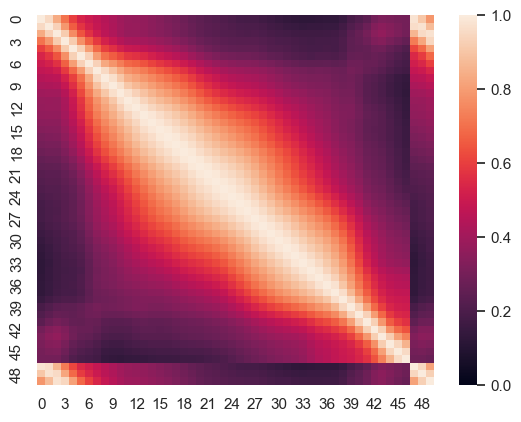

In [418]:
C = np.cov(Xn.T, bias=True)
C.shape
sns.heatmap(C[:50,:50], annot=False, vmin=0, vmax=1)
#plt.savefig("test.pdf", bbox_inches='tight')
plt.show()

# Performing the reduction

In [426]:
# Compute the components and projected faces
n = [10, 100, 150]
pca = []
components = []
projected = []
for i in range(len(n)):
    pca.append(RandomizedPCA(n[i]).fit(faces.data))
    components.append(pca[i].transform(faces.data))
    projected.append(pca[i].inverse_transform(components[i]))

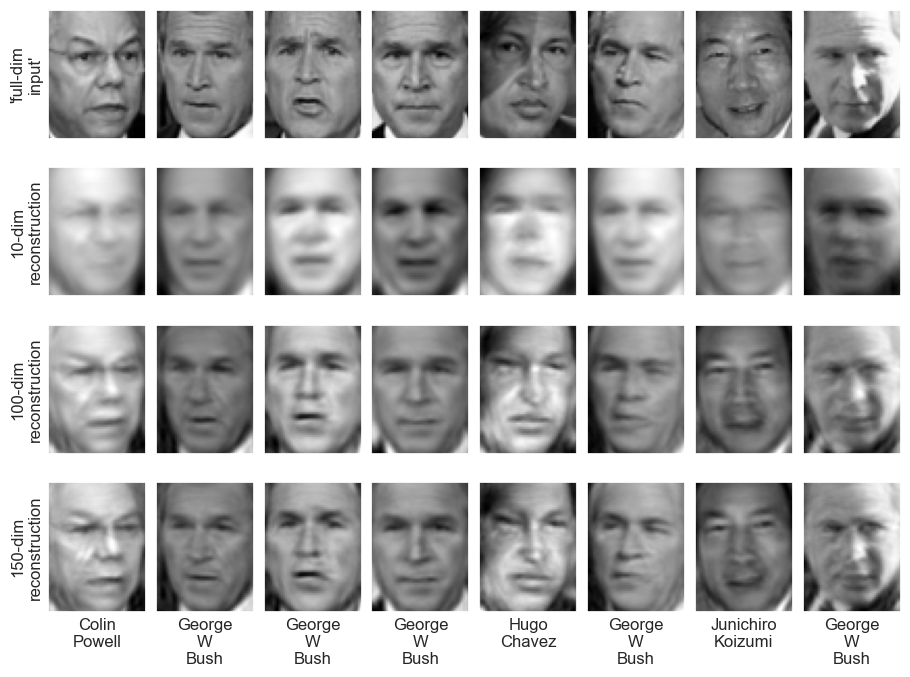

In [327]:
# Plot the results
n_faces = 8
fig, ax = plt.subplots(len(n)+1, n_faces, figsize=(11, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for j in range(1+len(n)):
    for i in range(n_faces):
        if j == 0:
            ax[j, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
            ax[j, 0].set_ylabel("'full-dim\ninput'")
        else:
            ax[j, i].imshow(projected[j-1][i].reshape(62, 47), cmap='binary_r')
            ax[j, 0].set_ylabel(f"{n[j-1]}-dim\nreconstruction")
        
        ax[-1,i].set_xlabel(faces.target_names[faces.target[i]].replace(' ' , '\n'))

plt.savefig("PCA_faces_results.pdf", bbox_inches='tight')
plt.show()
# ax[0, 0].set_ylabel('full-dim\ninput')
# ax[1, 0].set_ylabel('10-dim\nreconstruction')
# ax[2, 0].set_ylabel('10-dim\nreconstruction')

first principal component against the second

In [277]:
# plt.scatter(projected[-1][:, 0], projected[-1][:, 1],
#             c=faces.target, edgecolor='none', alpha=1,
#             cmap='Paired', s=2)
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.colorbar();

In [149]:
x = 0
indexes = np.where(faces.target == x)[0]
print(indexes)
print(faces.images[indexes])
print(faces.target_names[x])
print(faces.target[indexes])

[   9   15   21   35   41   45   69   74  111  122  127  170  204  209
  218  232  268  294  378  404  462  463  476  495  513  532  533  540
  548  550  553  559  562  573  630  633  659  671  692  737  758  773
  786  800  803  810  830  836  845  865  886  890  914  931  948  956
  990 1007 1015 1019 1032 1042 1044 1062 1081 1093 1097 1123 1129 1180
 1245 1258 1259 1289 1298 1305 1323]
[[[0.10196079 0.10980392 0.17908497 ... 0.67058825 0.6810458  0.6653595 ]
  [0.10196079 0.10457516 0.2496732  ... 0.6627451  0.67843133 0.6653595 ]
  [0.10849673 0.10849673 0.29542485 ... 0.61960787 0.6679738  0.6614379 ]
  ...
  [0.12810458 0.1124183  0.10588235 ... 0.75816995 0.8535948  0.9267974 ]
  [0.12810458 0.11764706 0.1124183  ... 0.78823537 0.90326804 0.951634  ]
  [0.12941177 0.12156863 0.11633987 ... 0.85490197 0.951634   0.96993464]]

 [[0.78039217 0.724183   0.66013074 ... 0.64836603 0.6614379  0.7294118 ]
  [0.76601315 0.7267974  0.6496732  ... 0.6392157  0.6509804  0.7163399 ]
  [0.752

In [134]:
faces.target[np.where(faces.target == 0)[0][i]]

0

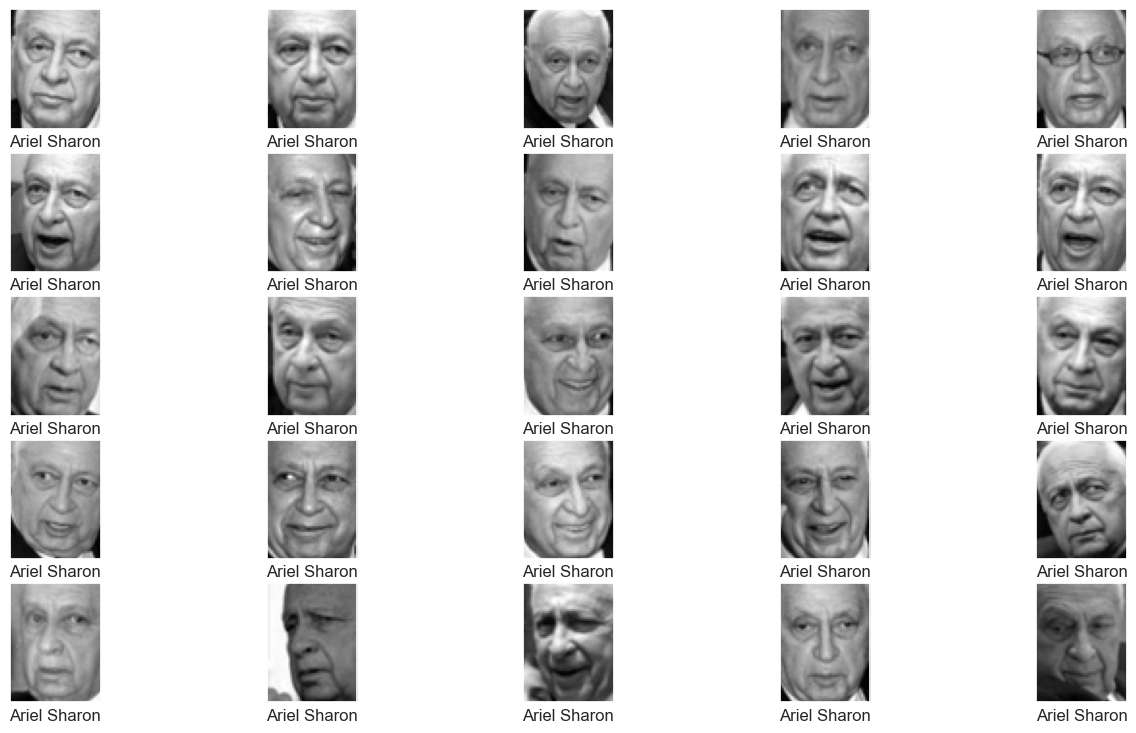

In [150]:
fig, ax = plt.subplots(5,5,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    j = np.where(faces.target == x)[0][i]
    img = faces.images[j]
    ax_i.imshow(img, cmap="binary_r")
    ax_i.set(xticks=[],yticks=[],xlabel=faces.target_names[x])

In [198]:
n = 10
new_faces_images = []
for i in range(n):
    new_faces_images.append([faces.images[:10,0,0][i] + [faces.images[:10][i].flatten()]])
new_faces_images = np.array(new_faces_images)

In [232]:
new_faces_images[:,0,0,:][:, 546]

array([1.1294118 , 0.8614379 , 0.95163405, 0.909804  , 0.79477125,
       0.6888889 , 0.8627451 , 1.075817  , 1.1777779 , 0.9790849 ],
      dtype=float32)

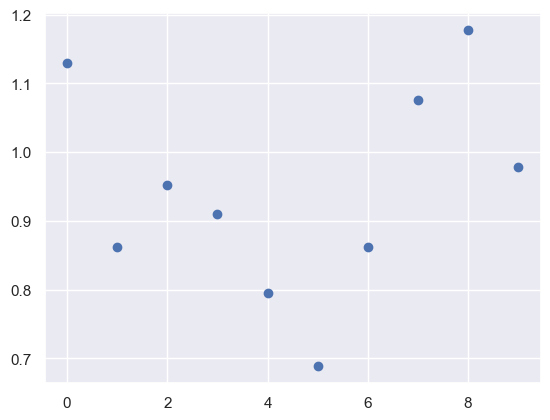

In [236]:

plt.scatter(x = range(len(new_faces_images[:,0,0,:][:, 546])), y=new_faces_images[:,0,0,:][:, 546] )
# plt.colorbar()
plt.show()